# Data

In [1]:
import pandas as pd

In [2]:
pents = pd.read_pickle("../data/interim/polyglot_entities_98_17.pkl")

In [3]:
_concepts = pd.read_pickle("../data/interim/concepts_98_17.pkl")

concepts_df = pd.DataFrame([
    {
        "Hash": hashid, 
        "Concept": concept["URI"].split("/")[-1], 
        "ConceptCategory": list(filter(lambda x: "DBpedia" in x, concept["types"].split(",")))[-1].split(":")[-1] if len(concept["types"]) else None,
    } 
    for hashid, concepts in _concepts.Concepts.iteritems() 
    for concept in concepts
]).set_index("Hash")

In [4]:
raw_df = pd.read_csv(
    "../data/interim/merged_98_17.tsv", 
    sep="\t"
).set_index("Hash").drop(["URL", "Text"], axis=1)
raw_df.Date = pd.to_datetime(raw_df["Date"])

In [5]:
data = raw_df.join(concepts_df)

# Queries

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data.columns

Index(['Date', 'SpeechType', 'SpeakerType', 'Name', 'Party', 'SpeakerId',
       'Concept', 'ConceptCategory'],
      dtype='object')

In [8]:
data[data.Name.str.contains("Orbán Viktor")].SpeechType.value_counts()

napirend előtti felszólalás                        1928
napirend előttihez hozzászólás                     1641
kérdést megválaszolja                               793
azonnali kérdésre adott miniszteri viszonválasz     757
felszólalás                                         370
Expozé                                              334
vezérszónoki felszólalás                            130
Előadói válasz                                       78
Eskü                                                 64
egyéb felszólalás                                    26
kétperces felszólalás                                21
előterjesztő nyitóbeszéde                            17
interpellációt szóban megválaszolja                   7
nem érdemi felszólalás                                3
Name: SpeechType, dtype: int64

In [9]:
data[data.Name.str.contains("Orbán Viktor")].ConceptCategory.value_counts()

Country              2032
PoliticalParty       1449
Politician            352
Settlement            243
Organisation           60
Currency               55
EthnicGroup            43
River                  25
Monarch                14
Newspaper              10
Road                    8
Company                 6
Island                  4
Person                  4
Lake                    4
HistoricPlace           4
Airline                 3
Building                3
Writer                  2
TelevisionShow          2
SoccerClub              2
Cleric                  1
Airport                 1
Ship                    1
MilitaryConflict        1
WorldHeritageSite       1
Language                1
Name: ConceptCategory, dtype: int64

In [18]:
ov = data[data.Name.str.contains("Orbán Viktor") & 
            ~data.Concept.fillna("").str.contains("Orbán") &
            ~data.Concept.fillna("").str.contains("Fidesz") &
            ~data.Concept.fillna("").str.contains("Magyarország")
         ]
#           (data.SpeechType == "napirend előtti felszólalás") & 


In [19]:
import datetime

topk = 10

ov98 = ov[(ov.Date < datetime.date(year=2002,month=1,day=1)) &
          (ov.Date > datetime.date(year=1998,month=1,day=1))].Concept.value_counts()[:topk]

ov02 = ov[(ov.Date < datetime.date(year=2006,month=1,day=1)) &
          (ov.Date > datetime.date(year=2002,month=1,day=1))].Concept.value_counts()[:topk]

ov06 = ov[(ov.Date < datetime.date(year=2010,month=1,day=1)) &
          (ov.Date > datetime.date(year=2006,month=1,day=1))].Concept.value_counts()[:topk]

ov10 = ov[(ov.Date < datetime.date(year=2014,month=1,day=1)) &
          (ov.Date > datetime.date(year=2010,month=1,day=1))].Concept.value_counts()[:topk]

ov14 = ov[
#           (ov.Date < datetime.date(year=2014,month=1,day=1)) &
          (ov.Date > datetime.date(year=2014,month=1,day=1))].Concept.value_counts()[:topk]

In [20]:
def comparision_plot(dfs, columns):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 6)
    data = pd.concat(dfs, axis=1)
    data.columns = columns
    data.plot(kind="bar", ax=ax)
    

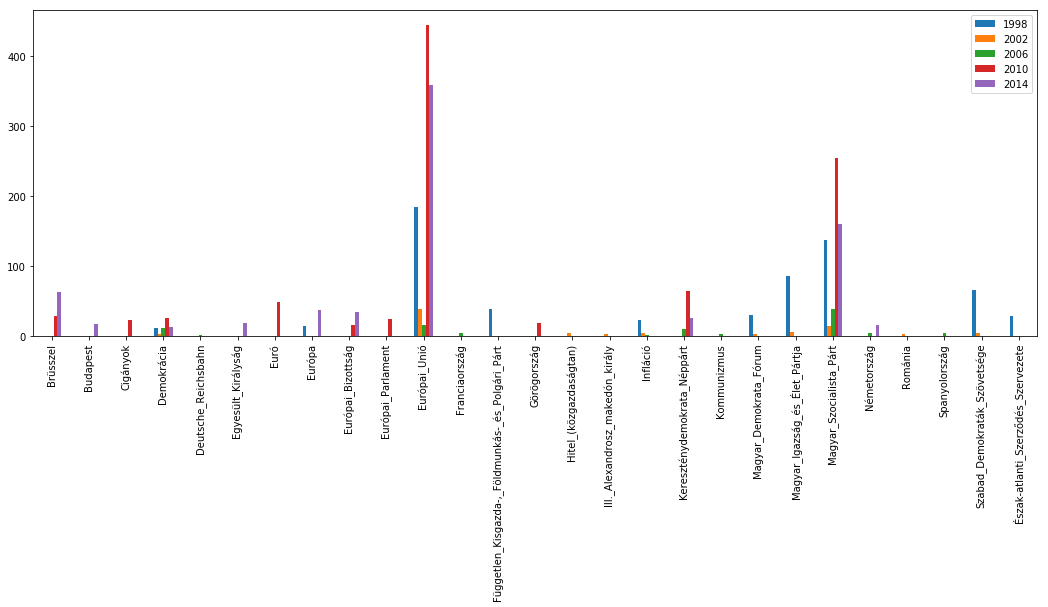

In [21]:
comparision_plot([ov98, ov02, ov06, ov10, ov14], [1998, 2002, 2006, 2010, 2014])